In [14]:
import pandas as pd
import sys 
import os
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

"""
Creates '.png' files with the relevant info of the networks
"""

"\nCreates '.png' files with the relevant info of the networks\n"

In [2]:
var_holder,tableinfo,tablename,i = {},[],[],0 #Varibles for iteration
filelist = [file for file in os.listdir(sys.path[0]) if file.endswith(".csv") ] #To only open .csv files
#filelist = filelist[1:10] + [filelist[0]] #To correct that net10_ is first than net1_
for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
    var_holder['Connection_table' + str(i+1)] =  pd.read_csv(os.path.join(sys.path[0], filename))
    tablename.append(filename.replace(".csvconnectiontable.csv",""))
    tableinfo.append('Connection_table' + str(i+1)+" correspond to the file "+tablename[i])
    i += 1
 #locals().update(var_holder) #To transform the dictionary keys into variables (usefull to test but the dictionaries are better to work with)

print("There are "+str(len(tableinfo))+" tables")
for x in range(len(tableinfo)):
    print(tableinfo[x])

There are 2 tables
Connection_table1 correspond to the file net1_reactome
Connection_table2 correspond to the file net8_reactome_remap_exprs


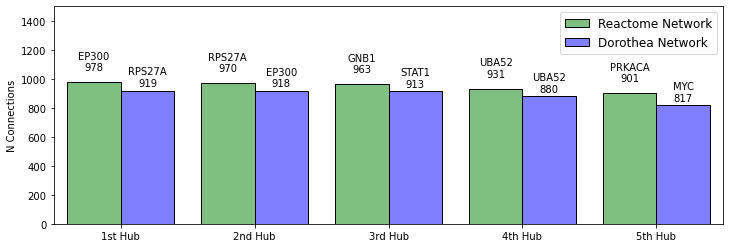

In [184]:
def conbarplot2lab(nhubs = 5):
    ## Data storage
    barWidth = 0.4
    
    C1 = [var_holder["Connection_table1"].iat[i,1] for i in range(nhubs)]
    Cn1 = [var_holder["Connection_table1"].iat[i,0] for i in range(nhubs)]
    C2 = [var_holder["Connection_table2"].iat[i,1] for i in range(nhubs)]
    Cn2 = [var_holder["Connection_table2"].iat[i,0] for i in range(nhubs)]
    
    r1 = np.arange(nhubs)
    r2 = [x + barWidth for x in r1]
    
    plt.figure(figsize=(12, 4))
    
    plt.bar(r1, C1, width = barWidth, color = (0,0.5,0,0.5), edgecolor = 'black', capsize=7, label='Reactome Network')
    plt.bar(r2, C2, width = barWidth, color = (0,0,1,0.5), edgecolor = 'black', capsize=7, label='Dorothea Network')
    
    
    # Add text on top of the bars
    for i in range(nhubs):
        plt.text(r1[i], C1[i]+80, f"{Cn1[i]}\n{C1[i]}", ha='center')
        plt.text(r2[i], C2[i]+30, f"{Cn2[i]}\n{C2[i]}", ha='center')    
    
    # general layout
    plt.xticks([r + barWidth/2 for r in range(nhubs)], ['1st Hub', '2nd Hub', '3rd Hub', '4th Hub', '5th Hub'])
    plt.ylabel('N Connections')
    plt.legend(fontsize='large')

    plt.xlim(-0.30, 4.7)  # Set the x-axis range
    plt.ylim(0, 1500)  # Set the y-axis range

    # Show graphic
    plt.savefig(os.path.join(sys.path[0],'Hubs.png'),format="png")
    plt.show()
    
conbarplot2lab()

In [ ]:
A = [var_holder[filename].shape[0] for filename in var_holder] # Number of genes
B = [round(var_holder[filename].sum()["Number of connections"]/var_holder[filename].shape[0],2) for filename in var_holder] # Average number of connections
D = [round(var_holder[filename][var_holder[filename]["Number of connections"] == 1].count()["Number of connections"]/var_holder[filename].shape[0],2) for filename in var_holder] # Proportion of genes with one connection 

In [193]:
def conbarplot2(Input, Label, Title):
    barWidth = 0.6
    r1 = np.arange(2) * 0.8
    
    fig, ax = plt.subplots(figsize=(3.5, 4))
    
    ax.bar(r1, Input, width=barWidth, color=[(0, 0.5, 0, 0.5), (0, 0, 1, 0.5)], edgecolor='black', capsize=7)
    
    # Add text on top of the bars
    for i, val in enumerate(Input):
        ax.text(r1[i], val + max(Input)*0.03, str(val), ha='center')  # Adjust the fontsize here
    
    ax.set_xticks(r1)
    ax.set_xticklabels(['Reactome Network', 'Dorothea Network'])  # Adjust the fontsize here
    ax.set_ylabel(Label)  # Adjust the fontsize here
    ax.set_ylim(0, max(Input) * 1.1)
    
    plt.savefig(os.path.join(sys.path[0], Title+'.png'),format="png")
    
    plt.show()

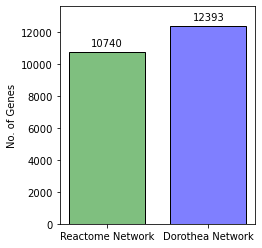

In [194]:
conbarplot2(A,"No. of Genes","No Genes per Network")

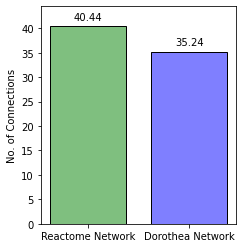

In [195]:
conbarplot2(B,"No. of Connections", "Average Connections per Network")

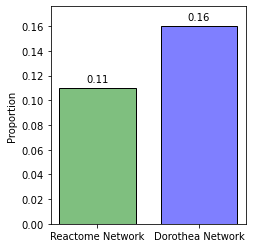

In [196]:
conbarplot2(D,"Proportion", "Genes with 1 connection")